# TZ Gaming: Optimal Targeting of Mobile Ads

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 200

In [2]:
# check that you have version 0.9.13 of the pyrsm package
# install in a terminal using: pip install --user "pyrsm>=0.9.13"
rsm.__version__

'0.9.13'

In [3]:
# loading data tz_gaming.parquet
tz_gaming = pd.read_parquet("data/tz_gaming.parquet")
tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrua,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,6.578947,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,0.689655,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833


> Note: Review the data description carefully and watch the "Video: TZ gaming preview (12 min)" linked on Canvas

> Note: Full question details are contained in the tz-gaming-msba.pdf file


## Part I: Logistic regression (10 points)

a. Estimate a logistic regression model with the following variables `time_fct app mobile_os impua clua ctrua` as the explanatory variables (features) and `click` as the response variable (target)

> Note: Use only the rows that are labeled `train` in the `training` variable

In [4]:
tz_train = tz_gaming[tz_gaming["training"] == 'train']

len(tz_train)

87535

In [5]:
lr = rsm.model.logistic(
    data = {'tz_train' : tz_train},
    rvar = 'click', lev = 'yes',
    evar = ['time_fct', 'app', 'mobile_os', 'impua', 'clua', 'ctrua']
)

lr.summary()

Logistic regression (GLM)
Data                 : tz_train
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%        -3.53       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%        -0.47       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%        -0.33       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%       -23.54   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%       -23.72   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%        -1.05       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%         0.20       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%         0.10       0.296    0.335   0.737     
time_fct[

b. Summarize and interpret the logistic regression results. Which of these explanatory variables are statistically significant? Which variables seem to be most "important"? Make sure your model evaluation includes (1) an interpretation of the Permutation importance and Prediction plots for the explanatory variables `mobile_os`, `impua`, `clua`, and `ctrua` and (2) an evaluation of the model as a whole using Pseudo R-squared and the Chi-square test (5 points).

#### app[app2], app[app4], app[app6], app[app16], app[app18],app[app21], app[app23], app[app27], app[app29], app[app31], app[app33], app[app13], app[app14], mobile_os[ios] , impua, clua, ctrua are statistically significant.

#### Intercept: The coefficient of the intercept is -3.53, with a very low p-value (<.001), indicating it is statistically significant. The negative coefficient suggests a low baseline probability of a click when all other variables are at zero.


In [6]:
##evaluate model fit
lr.summary(main = False, fit = True)


Pseudo R-squared (McFadden): 0.109
Pseudo R-squared (McFadden adjusted): 0.092
Area under the RO Curve (AUC): 0.792
Log-likelihood: -3946.072, AIC: 8046.145, BIC: 8768.389
Chi-squared: 968.279, df(76), p.value < 0.001 
Nr obs: 87,535


#### The test of Preudo R-squared is to evaluate the goodness of fit of the logistic regression model. It is generally lower than the R-squared values seen in linear regression. A value of 0.109 indicates that the model has some improvement in explanatory power over a null model (a model with no predictors). 

#### The test of Pseudo R-squared (McFadden adjusted) is an adjusted version of McFadden's R-squared that accounts for the number of explanatory variables in the model. The value of 0.092 is slightly lower than the unadjusted R-squared, this suggests that the model may include some variables that are not absolutely necessary. These variables have improved the model's fit to some extent, but do not show a corresponding increase in predictive ability after adjusting for complexity.

#### The Area under to RO curve is 0.792, which is a good value. It indicates that the model has a good ability to distinguish between the two classes. 0.5 is the lowest possible value, which indicates that the model is no better than random guessing. 1.0 is the highest possible value, which indicates that the model is perfect at distinguishing between the two classes.

#### The Chi-square test is the difference between the model and the baseline model, The higher Chi-square indicating that the set of explanatory variables in the model is more effective in predicting the response variable. 

#### p-value (<0.001): This very small p-value indicates that the set of explanatory variables in the model is statistically significantly associated with the response variable. In other words, this means that we can reject the null hypothesis (i.e., the explanatory variables are not related to the response variable) with high confidence.







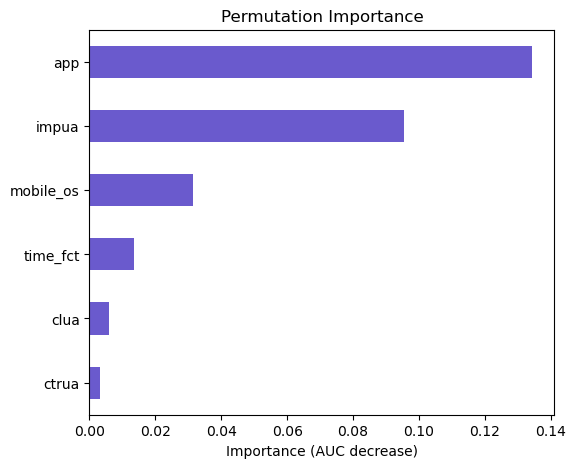

In [7]:
# discuss and add code to calculate additional statistics as needed
## permutation importance and plots for explanatory variables
lr.plot('vimp')

#### The permutation importance plot is a measure of the importance of each explanatory variable in the model. The higher the value, the more important the explanatory variable is in predicting the response variable. The permutation importance plot shows that the importance of explanatory variables are: app > impua > mobile_os > clua > ctrua. 

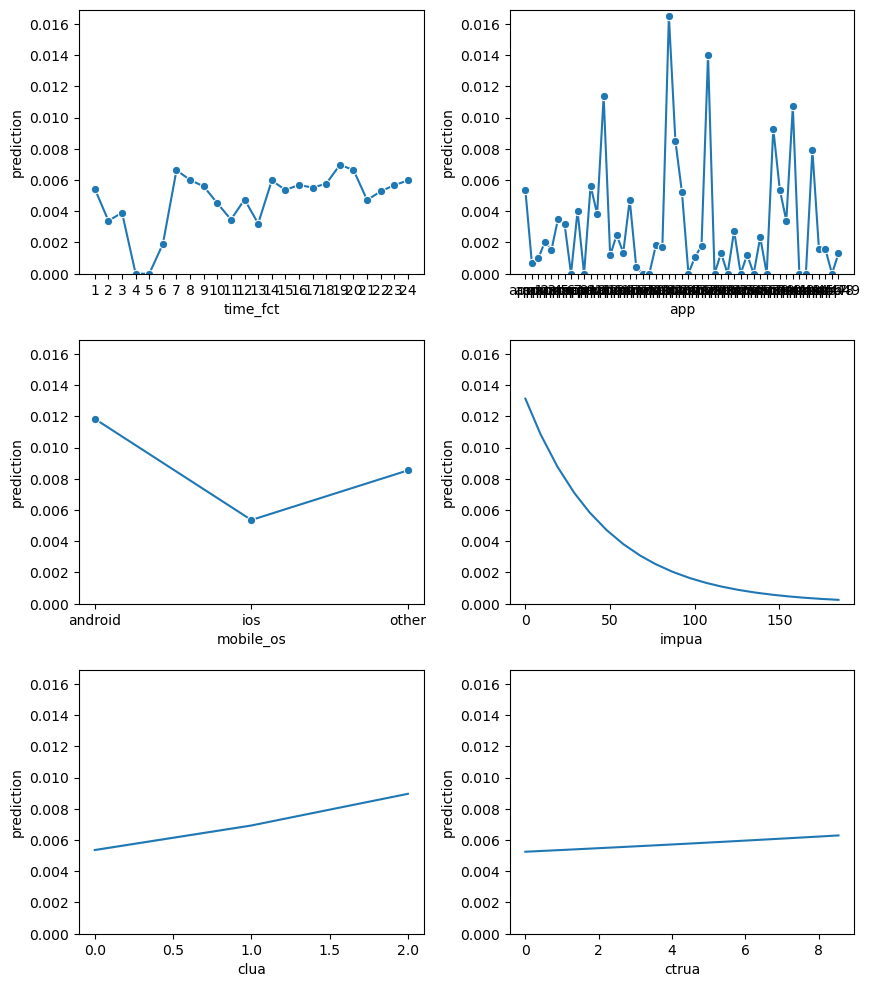

In [8]:
lr.plot("pred")

c. Predict the probability of a click (2 point)

The estimated logistic regression model can predict the probability of a click. Create a new variable `pred_logit` with the predicted click-through probabilities linked to each impression. Make sure to generate predictions for all rows in the training and test data.


In [9]:
tz_gaming["pred_logit"] = lr.predict(tz_gaming).loc[:, 'prediction']

tz_gaming.tail()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,158,0,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,0.001093
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,74,1,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,0.003609
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,19,0,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,0.020527
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,37,1,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,0.021922
115487,test,I399994,no,18,18,app1,ios,498,7,1.405622,...,53,1,1.886792,77884,1201,1.542037,0.857281,0.003961,id705546,0.011703


d. Estimate a logistic regression with `click` as the response variable and `rnd` as the **only** explanatory variable. As before, the model should be estimated on the training sample (i.e., "training == 'train'"). Create a new variable `pred_rnd` with the predicted click-through probabilities (1 point).

In [10]:
lr_rnd = rsm.model.logistic(
    data = {'tz_training' : tz_train},
    rvar = 'click', lev = 'yes',
    evar = 'rnd'
)
tz_gaming["pred_rnd"] = lr_rnd.predict(tz_gaming).loc[:, 'prediction']
tz_gaming.tail()

#lr_rnd.summary()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,0.001093,0.009435
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,1,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,0.003609,0.008930
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,0,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,0.020527,0.008806
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,1,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,0.021922,0.008896
115487,test,I399994,no,18,18,app1,ios,498,7,1.405622,...,1,1.886792,77884,1201,1.542037,0.857281,0.003961,id705546,0.011703,0.008574


## Part II: Understanding Multicollinearity (10 points)

a. Estimate a logistic regression model with `click` as the response variable and `imppat`, `clpat`, and `ctrpat` as the only explanatory variables. What is the interpretation of the Prediction plots for the explanatory variables? (2 points)

> Note: Make sure to watch the "Video: TZ gaming preview (12 min)" on Canvas before answering this questions so you fully understand what the variables represent

In [11]:
lr_mc1 = rsm.model.logistic(
    data = {'tz_training' : tz_train},
    rvar = 'click', lev = 'yes',
    evar = ['imppat', 'clpat', 'ctrpat']
)

lr_mc1.summary(vif = True)

Logistic regression (GLM)
Data                 : tz_training
Response variable    : click
Level                : yes
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

           vif    Rsq
clpat   26.242  0.962
imppat  23.467  0.957


... discuss the results here ...
#### 1. The intercept with OR = 0.004, OR% = -99.6%: The odds of a click occurring when all other variables are zero is very low but make non sense.

#### 2. The imppat with OR = 1.000, OR% = 0.0%: imppat means 'Number of past impressions that showed the TZ ad in the app in the hour.' OR = 1.000 means The odds of a click do not significantly increase with an increase in the number of past impressions of the TZ ad in the app within the hour. coefficient is very close to zero, this means a very small or negligible effect.

#### 3. The clpat with OR = 1.002, OR% = 0.2%: clpat means 'Number of past clicks the TZ ad has received in the app in the hour' OR = 1.002 means for the additional number of past clicks the TZ ad has received in the app in the hour, the odds of a click will increase by 0.2% or increase by factor of 1.002. This is a positive relationship, suggesting that more past clicks are associated with a higher likelihood of a future click.

#### 4. The ctrpat with OR = 1.615, OR% = 61.5%: ctrpat means 'Past CTR (× 100) of the TZ ad in the app in the hour.' OR = 1.615 means for the additional Past CTR (× 100) of the TZ ad in the app in the hour, the odds of a click will increase by 61.5% or increase by factor of 1.615. This is a substantial increase, indicating that ads with higher past click-through rates are much more likely to be clicked.

#### 5. The Pseudo R-squared value is 0.035, which is relatively low, which suggests that the model explains a small portion of the variance in the likelihood of a click. 

#### 6. Pseudo R-squared (McFadden adjusted): 0.035, the R-squared and adjusted R-squared values are the same, indicating that the model does not include any unnecessary variables.

#### 7. The Area under to RO curve is 0.676, indicates that the model has moderate predictive power.

#### 8. The Chi-square test is 314.248 with a p-value of <0.001, indicating that the explanatory variables in the model are statistically significantly associated with the response variable.


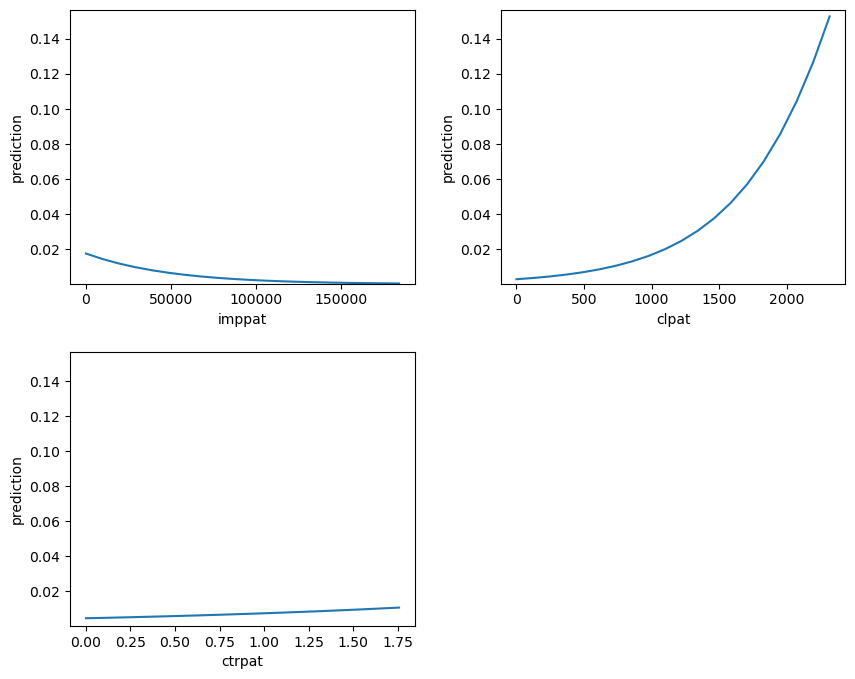

In [12]:
lr_mc1.plot('pred')

#### Through the prediction plot

#### 1. the probability of a click decreases as imppat increases. This is a negative relationship, suggesting that more imppat are associated with a lower likelihood of a future click.

#### 2. the probability of a click increases as clpat increases. This is a positive relationship, suggesting that more clpat are associated with a higher likelihood of a future click.

#### 3. the probability of a click slightly increases as ctrpat increases. This is a positive relationship, suggesting that more ctrpat are associated with a slightly higher likelihood of a future click.

b. Some of the variables in the dataset are highly correlated with each other. In particular, `imppat` and `clpat` have a strong positive correlation of 0.97. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. What are the implications for the model and the interpretation of the Prediction plots? As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a (4 points).

> Note: Assign your new model without `clpat` to a new object `lr_mc2`. Calculate VIF statistics for each explanatory variable in the model


In [13]:
lr_mc2 = rsm.model.logistic(
    data = {'tz_training' : tz_train},
    rvar = 'click', lev = 'yes',
    evar = ['imppat', 'ctrpat']
)

lr_mc2.summary(vif = True)

Logistic regression (GLM)
Data                 : tz_training
Response variable    : click
Level                : yes
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.53      0.068  -80.814  < .001  ***
imppat     1.000    0.0%         0.00      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%         0.55      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

          vif    Rsq
imppat  1.134  0.118
ctrpat  1.134  0.118


#### 1. High correlation between explanatory variables is difficult to determine the individual effect of collinear variables on the response variable.

#### 2. After we remove clpat from the model, we can see the VIF of imppat and ctrpat are both 1.134, which is lower than 5. This means the remaining variables do not suffer from problematic multicollinearity.

#### 3. The R-squared values associated with the VIF for both variables are 0.118, which indicates that approximately 11.8% of the variance of each predictor is explained by the other predictor. This is a moderate amount, and with VIFs at this level, the concern for collinearity is substantially reduced.


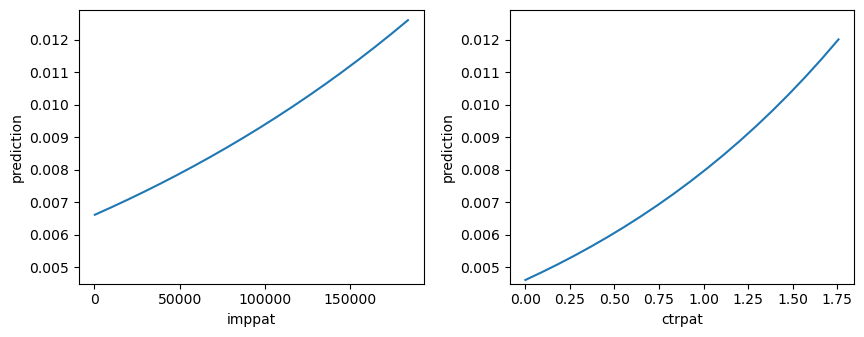

In [14]:
lr_mc2.plot('pred')

#### WHY VIF CHANGED AFTER WE REMOVE CLPAT FROM THE MODEL?

#### The VIFs for clpat and imppat were quite high initially, indicating significant multicollinearity, which can inflate the variance of the estimated regression coefficients, making them unstable and unreliable. After clpat was removed, the VIFs for both remaining variables (imppat and ctrpat) dropped to near 1, which indicates that the multicollinearity has been significantly reduced or eliminated. 

#### WHY PREDICTION PLOT CHANGED AFTER WE REMOVE CLPAT FROM THE MODEL?
 
#### Due to the omitted variable bias. Here, we set the omitted variable as 'clpat,' if we dropped:

#### 1. The previously masked effects of "imppat" and "ctrpat" become more apparent.

#### 2. These variables can now explain the variability in the response variable that "clpat" was accounting for, resulting in a more pronounced relationship in prediction plots.

#### 3. The true relationship between "imppat" and "ctrpat" with the response variable may be revealed, as they are no longer competing with "clpat" for explanatory power.

#### That's why the plot changed after we remove clpat from the model: the explanatory power of imppat and ctrpat are more apparent.

c. Estimate another logistic regression model with `click` as the response variable and `time_fct`, `app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the Prediction plots for `imppat`, `clpat`, and `ctrpat` different compared to the plots from the model you estimated in II.a? Please be specific and investigate beyond simply stating the statistical problem (4 points).


In [15]:
lr_mc3 = rsm.model.logistic(
    data = {'tz_training' : tz_train},
    rvar = 'click', lev = 'yes',
    evar = ['time_fct', 'app', 'imppat', 'clpat', 'ctrpat']
)

lr_mc3.summary(vif = True)

Logistic regression (GLM)
Data                 : tz_training
Response variable    : click
Level                : yes
Explanatory variables: time_fct, app, imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                 OR      OR%  coefficient   std.error  z.value p.value     
Intercept     0.012   -98.8%        -4.42       0.284  -15.575  < .001  ***
time_fct[2]   0.588   -41.2%        -0.53       0.323   -1.644     0.1     
time_fct[3]   0.693   -30.7%        -0.37       0.461   -0.795   0.426     
time_fct[4]   0.000  -100.0%       -23.83   43904.903   -0.001     1.0     
time_fct[5]   0.000  -100.0%       -23.86   57249.164   -0.000     1.0     
time_fct[6]   0.359   -64.1%        -1.03       1.027   -0.999   0.318     
time_fct[7]   1.220    22.0%         0.20       0.438    0.453    0.65     
time_fct[8]   1.135    13.5%         0.13       0.309    0.411   0.681     
time_fct[9]   1.063     6.3%         0.06       0.

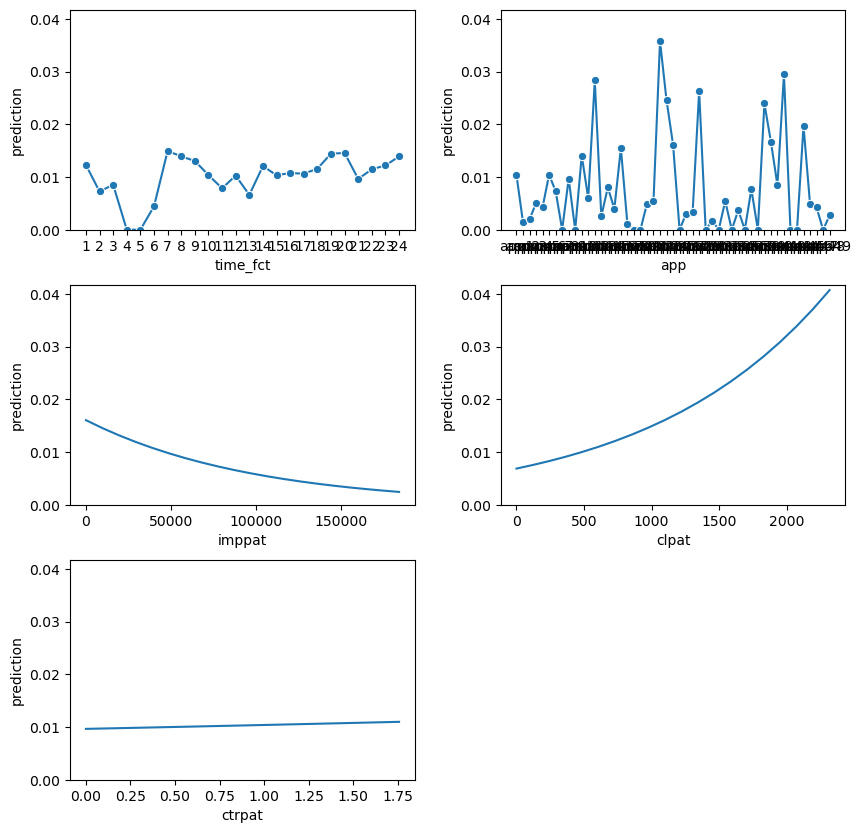

In [16]:
lr_mc3.plot("pred")

 ... insert your answer here ...

 #### Overlap in Variable Explanations (Multicollinearity): The inclusion of the multi-level app variable might have introduced additional correlation with imppat, clpat, and ctrpat. This increased multicollinearity can destabilize model estimates, distorting the prediction plot shapes as the model compensates for these highly interrelated explanatory variables.

#### Time Dynamics (Time Effects): Introducing time_fct helps capture temporal patterns in click behaviors that were possibly overlooked in the previous model. Controlling for these patterns could redistribute the significance of other explanatory variables in the model, reflected by changes in the prediction plots for imppat, clpat, and ctrpat.

#### Distinct Impact of Applications (App-Specific Effects): The app variable may reveal the unique effects of different applications on click probability. If certain apps engage users more or prompt more interactions, this could alter the relationships between other explanatory variables and the probability of a click, impacting their prediction plots.

#### Enhanced Model Fidelity (Improved Model Fit): Higher Pseudo R-squared and AUC values indicate the new model potentially captures the predictor-response relationships more accurately. This refined fitting could present smoother or altered trends in the prediction plots for imppat, clpat, and ctrpat, as the model estimates these relationships with greater precision.

#### Adjustments in Prediction Plots (Prediction Plot Changes): Variations in the prediction plots could suggest that the new variables are assuming some of the explanatory power previously attributed to the original variables. The new model's more nuanced variable representation may lessen the direct associations between imppat, clpat, and ctrpat and the click response, leading to altered curve shapes and slopes.

#### Modifications in Data Sampling (Sample Distribution Changes): If the datasets used for the two models differ in the distribution of key variables, this could affect parameter estimation and predictions. Changes in data could stem from different sampling strategies or data cleaning processes.



## Part III: Decile Analysis of Logistic Regression Results (5 points)

> Note: For the following questions, use only the "test" sample of impressions (i.e., 27,953 rows
where "training == 'test'")

In [17]:
tz_test = tz_gaming[tz_gaming["training"] == 'test']
len(tz_test)

27953

In [18]:
tz_gaming.tail()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,0.001093,0.009435
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,1,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,0.003609,0.008930
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,0,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,0.020527,0.008806
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,1,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,0.021922,0.008896
115487,test,I399994,no,18,18,app1,ios,498,7,1.405622,...,1,1.886792,77884,1201,1.542037,0.857281,0.003961,id705546,0.011703,0.008574


a. Assign each impression to a decile based on the predicted probability of click through (`pred_logit`) based on the model estimated in I.a. Create a new variable `pred_logit_dec` that captures this information. Note: The first decile should have the highest average click-through rate. If not, make sure to "reverse" the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Use the `xtile` function from the `pyrsm` package to create the deciles (2 points)

In [19]:
tz_gaming["pred_logit_dec"] = (
    tz_gaming
    .groupby(tz_gaming['training'] == 'test')
    .pred_logit
    .transform(rsm.xtile, n=10, rev=True)
)

tz_gaming.head()

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8


b. Report the number of impressions, the number of clicks, and the click-through rate for the TZ ad per decile and save this information to a DataFrame. Use the name `dec_tab` for the new data frame (2 points)

In [20]:
# your data frame should have columns called 'nr_impressions', 'nr_clicks', and 'ctr'
# to calculate these values you need deciles, the number of rows (impressions)
# in each decile, the number of clicks in each decile using the `click` variable,
# and the ratio of clicks to impressions (ctr)

tz_gaming['click_yes'] = rsm.ifelse(
    tz_gaming['click'] == 'yes', 1, rsm.ifelse(tz_gaming['click'] == 'no', 0, np.nan)
)

dec_tab = (
    tz_gaming[tz_gaming.training == 'test'].groupby('pred_logit_dec')
    .agg(
        nr_impressions = ('pred_logit', 'count'),
        nr_click = ('click_yes', 'sum'),
        ctr = ('click_yes', 'mean')
    )
    .reset_index()
)

dec_tab

,pred_logit_dec,nr_impressions,nr_click,ctr
0,1,2796,103.0,0.036838
1,2,2793,48.0,0.017186
2,3,2788,42.0,0.015065
3,4,2796,30.0,0.010730
4,5,2802,15.0,0.005353
5,6,2796,7.0,0.002504
6,7,2794,7.0,0.002505
7,8,2796,3.0,0.001073
8,9,2796,4.0,0.001431
9,10,2796,12.0,0.004292


c. Create a bar chart of click-through rates per decile (i.e., use `pred_logit_dec` as the x-variable and `ctr` as the y-variable). Note that the "click through rate" is not the same as the "predicted probability of click." The click-through rate captures the proportion of impressions in a given group (e.g., in a decile) that actually resulted in a click (1 point)


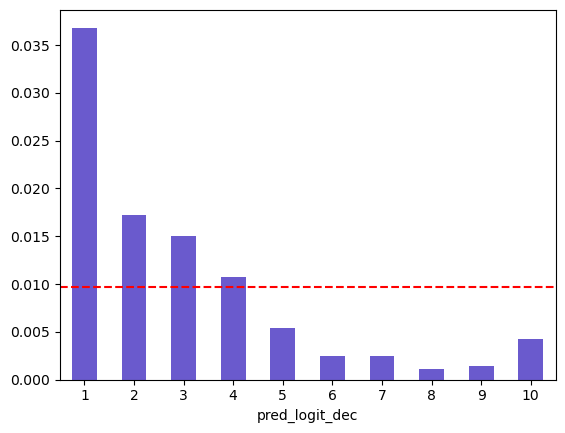

In [21]:
fig = dec_tab.plot.bar(
    x = 'pred_logit_dec', 
    y = 'ctr',
    rot = 0,
    color = 'slateblue',
    legend = None
)

fig = fig.axhline(
    y = dec_tab.ctr.mean(),
    color = 'red',
    linestyle = '--'
)


## Part IV: Lift, Gains, and Profit (15 points)

Use the `dec_tab` DataFrame you created in Part III for the following calculations.

a. Write python code to generate a table with the cumulative proportion of impressions and the cumulative gains for each decile (8 points)

> Note: Do NOT use any specialized python packages to construct the gains table. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [22]:
dec_tab

,pred_logit_dec,nr_impressions,nr_click,ctr
0,1,2796,103.0,0.036838
1,2,2793,48.0,0.017186
2,3,2788,42.0,0.015065
3,4,2796,30.0,0.010730
4,5,2802,15.0,0.005353
5,6,2796,7.0,0.002504
6,7,2794,7.0,0.002505
7,8,2796,3.0,0.001073
8,9,2796,4.0,0.001431
9,10,2796,12.0,0.004292


In [23]:
## cumulative proportion of impressions
dec_tab['cum_impressions'] = dec_tab.nr_impressions.cumsum()
dec_tab

dec_tab['cum_prop_impressions'] = dec_tab.cum_impressions / dec_tab.nr_impressions.sum()
## gains: proportion of total number of impressions accounted for by each decile
dec_tab['Gains'] = dec_tab.nr_click / dec_tab.nr_click.sum()
dec_tab

dec_tab['cum_Gains'] = dec_tab.Gains.cumsum()
dec_tab

,pred_logit_dec,nr_impressions,nr_click,ctr,cum_impressions,cum_prop_impressions,Gains,cum_Gains
0,1,2796,103.0,0.036838,2796,0.100025,0.380074,0.380074
1,2,2793,48.0,0.017186,5589,0.199943,0.177122,0.557196
2,3,2788,42.0,0.015065,8377,0.299682,0.154982,0.712177
3,4,2796,30.0,0.010730,11173,0.399707,0.110701,0.822878
4,5,2802,15.0,0.005353,13975,0.499946,0.055351,0.878229
5,6,2796,7.0,0.002504,16771,0.599971,0.025830,0.904059
6,7,2794,7.0,0.002505,19565,0.699925,0.025830,0.929889
7,8,2796,3.0,0.001073,22361,0.799950,0.011070,0.940959
8,9,2796,4.0,0.001431,25157,0.899975,0.014760,0.955720
9,10,2796,12.0,0.004292,27953,1.000000,0.044280,1.000000


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis (7 points)

> Note: Do NOT use any specialized packages to construct the gains chart. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [24]:
new_row = pd.DataFrame({col: [0] for col in dec_tab.columns})
dec_tab = pd.concat([new_row, dec_tab]).reset_index(drop=True)
dec_tab.head()

,pred_logit_dec,nr_impressions,nr_click,ctr,cum_impressions,cum_prop_impressions,Gains,cum_Gains
0,0,0,0.0,0.000000,0,0.000000,0.000000,0.000000
1,1,2796,103.0,0.036838,2796,0.100025,0.380074,0.380074
2,2,2793,48.0,0.017186,5589,0.199943,0.177122,0.557196
3,3,2788,42.0,0.015065,8377,0.299682,0.154982,0.712177
4,4,2796,30.0,0.010730,11173,0.399707,0.110701,0.822878


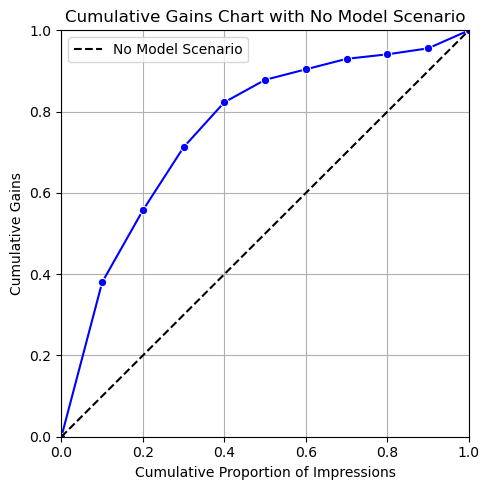

In [25]:
plt.figure(figsize=(5, 5))
sns.lineplot(x='cum_prop_impressions', y='cum_Gains', data=dec_tab, marker='o', linestyle='-', color='blue')

plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='No Model Scenario')

plt.title('Cumulative Gains Chart with No Model Scenario')
plt.xlabel('Cumulative Proportion of Impressions')
plt.ylabel('Cumulative Gains')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Part V: Confusion matrix (10 points)

a. Create a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I.a (i.e., the model used to generate `pred_logit`). Again, use **only** data from the test set here (i.e., "training == 'test'"). Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., breakeven). Calculate "accuracy" based on the confusion matrix you created (2 points)

> Note: Do NOT use any specialized packages to construct the confusion matrix. Code the matrix from scratch.  Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

> Note use the code format below to store the relevant values from your confusion matrix

In [26]:
#Targeting of impressions to consumers covered by the Vneta ad-network to date has been (approximately) random

#Cost per 1,000 video impressions (CPM) is $10
cost = 10 / 1000

#Conversion to sign-up as a TZ game player after clicking on an ad is 5%
cost_per_click = cost / 0.05
#The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
clv = 25

#The price charged for the data by Vneta is $50K
#data_price_Vneta = 50000 #free for this question

#The price charged for the data science consulting services by Vneta is $150K
#consulting_price_Vneta = 150000 #free for this question

#calculate the break_even
break_even = cost_per_click / clv

cost, break_even

(0.01, 0.008)

In [27]:
## how many pred_logit are greater than break_even?
tz_test = tz_gaming[tz_gaming['training'] == 'test']
len(tz_test[tz_test['pred_logit'] > break_even])

tz_test['pred_binary'] = np.where(tz_test['pred_logit'] > break_even, 1, 0)

tz_test.head()


/tmp/ipykernel_39058/163330509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_test['pred_binary'] = np.where(tz_test['pred_logit'] > break_even, 1, 0)


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,click_yes,pred_binary
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,957,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791,4,0.0,1
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718,4,0.0,1
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,8,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448,10,0.0,0
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,276,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630,5,0.0,0
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,874,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086,3,0.0,1


In [28]:
## TP: true positive (pred P, actual P)
## FP: false positive (pred P, actual N)
## TN: true negative (pred N, actual N)
## FN: false negative (pred N, actual P)

# True Positives (TP): both actual and predicted values are 1
TP = np.sum((tz_test['click_yes'] == 1) & (tz_test['pred_binary'] == 1))

# True Negatives (TN): both actual and predicted values are 0
TN = np.sum((tz_test['click_yes'] == 0) & (tz_test['pred_binary'] == 0))

# False Positives (FP): actual value is 0 but predicted value is 1
FP = np.sum((tz_test['click_yes'] == 0) & (tz_test['pred_binary'] == 1))

# False Negatives (FN): actual value is 1 but predicted value is 0
FN = np.sum((tz_test['click_yes'] == 1) & (tz_test['pred_binary'] == 0))

TP, TN, FP, FN

(221, 17021, 10661, 50)

In [29]:
cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
            # TP, FP, TN, and FN values in that order
    }
)
cm_logit

,label,nr
0,TP,221
1,FP,10661
2,TN,17021
3,FN,50


In [30]:
# (TP + TN) / (TP + FP + TN + FN)
accuracy_logit = (TP + TN) / (TP + FP + TN + FN)# float
accuracy_logit

0.6168210925482059

b. Calculate a DataFrame with elements from a confusion matrix based on `pred_rnd` created in Part I and calculate `accuracy` based on the confusion matrix you created (2 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [31]:
tz_test['pred_rnd_binary'] = np.where(tz_test['pred_rnd'] > break_even, 1, 0)

tz_test.head()


/tmp/ipykernel_39058/2698818713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_test['pred_rnd_binary'] = np.where(tz_test['pred_rnd'] > break_even, 1, 0)


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,click_yes,pred_binary,pred_rnd_binary
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791,4,0.0,1,1
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718,4,0.0,1,1
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448,10,0.0,0,1
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630,5,0.0,0,1
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086,3,0.0,1,1


In [32]:
## TP: true positive (pred P, actual P)
## FP: false positive (pred P, actual N)
## TN: true negative (pred N, actual N)
## FN: false negative (pred N, actual P)

# True Positives (TP): both actual and predicted values are 1
TP = np.sum((tz_test['click_yes'] == 1) & (tz_test['pred_rnd_binary'] == 1))

# True Negatives (TN): both actual and predicted values are 0
TN = np.sum((tz_test['click_yes'] == 0) & (tz_test['pred_rnd_binary'] == 0))

# False Positives (FP): actual value is 0 but predicted value is 1
FP = np.sum((tz_test['click_yes'] == 0) & (tz_test['pred_rnd_binary'] == 1))

# False Negatives (FN): actual value is 1 but predicted value is 0
FN = np.sum((tz_test['click_yes'] == 1) & (tz_test['pred_rnd_binary'] == 0))

In [33]:
cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr":  [TP, FP, TN, FN]
    }
)

cm_rnd

,label,nr
0,TP,271
1,FP,27606
2,TN,76
3,FN,0


In [34]:
accuracy_rnd = (TP + TN) / (TP + FP + TN + FN)# float
accuracy_rnd

0.012413694415626229

c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions (3 points)

#### 1. Similarities:

##### a. Both models have successfully identified true positives, with pred_rnd identifying more (271 vs 221).

##### b. Both models have false positives and true negatives, indicating that they can identify both correct and incorrect classifications to some extent.

#### 2. Differences:

##### a. The model based on pred_logit has a higher accuracy (0.61682109254820599 vs 0.012413694415626229), indicating that it is better to use pred_logit to predict the probability of a click.

##### b. The pred_rnd model has significantly more false positives than the pred_logit model (27606 vs 10661). This indicates a much higher rate of incorrectly predicting the positive class for pred_rnd. --> cause more cost for the company.

##### c. The pred_rnd model has no false negative, indicating that it predicted all positive instances correctly.

##### d. The pred_rnd model has almost no true negatives (only 76), compared to a substantial number for pred_logit (17021). This suggests that pred_logit is much better at correctly identifying the negative class.

#### 3. Conclusion:

##### a. The pred_logit model is better at predicting the probability of a click, and it is better to use pred_logit to predict the probability of a click.

##### b. Considering the balance between TP, FP, TN, and FN, pred_logit seems more balanced and likely to be the better model overall, as it maintains a reasonable rate of true positives while controlling the number of false positives and maintaining a high number of true negatives.

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices, again discuss the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions (3 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [35]:
break_even2 = 0.5
## Va:
tz_test['pred_binary2'] = np.where(tz_test['pred_logit'] > break_even2, 1, 0)

# True Positives (TP): both actual and predicted values are 1
TP2 = np.sum((tz_test['click_yes'] == 1) & (tz_test['pred_binary2'] == 1))

# True Negatives (TN): both actual and predicted values are 0
TN2 = np.sum((tz_test['click_yes'] == 0) & (tz_test['pred_binary2'] == 0))

# False Positives (FP): actual value is 0 but predicted value is 1
FP2 = np.sum((tz_test['click_yes'] == 0) & (tz_test['pred_binary2'] == 1))

# False Negatives (FN): actual value is 1 but predicted value is 0
FN2 = np.sum((tz_test['click_yes'] == 1) & (tz_test['pred_binary2'] == 0))


/tmp/ipykernel_39058/552683376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_test['pred_binary2'] = np.where(tz_test['pred_logit'] > break_even2, 1, 0)


In [36]:
cm_logit_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP2, FP2, TN2, FN2]
    }
)

cm_logit_recalc

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [37]:
accuracy_logit_recalc = (TP2 + TN2) / (TP2 + FP2 + TN2 + FN2)# float
accuracy_logit_recalc

0.9903051550817443

> Note use the code format below to store the relevant values from your confusion matrix

In [38]:
## Vb:
tz_test['pred_rnd_binary2'] = np.where(tz_test['pred_rnd'] > break_even2, 1, 0)

# True Positives (TP): both actual and predicted values are 1
TP3 = np.sum((tz_test['click_yes'] == 1) & (tz_test['pred_rnd_binary2'] == 1))

# True Negatives (TN): both actual and predicted values are 0
TN3 = np.sum((tz_test['click_yes'] == 0) & (tz_test['pred_rnd_binary2'] == 0))

# False Positives (FP): actual value is 0 but predicted value is 1
FP3 = np.sum((tz_test['click_yes'] == 0) & (tz_test['pred_rnd_binary2'] == 1))

# False Negatives (FN): actual value is 1 but predicted value is 0
FN3 = np.sum((tz_test['click_yes'] == 1) & (tz_test['pred_rnd_binary2'] == 0))


/tmp/ipykernel_39058/3279677207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_test['pred_rnd_binary2'] = np.where(tz_test['pred_rnd'] > break_even2, 1, 0)


In [39]:
cm_rnd_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP3, FP3, TN3, FN3]
    }
)

cm_rnd_recalc

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [40]:
accuracy_rnd_recalc = (TP3 + TN3) / (TP3 + FP3 + TN3 + FN3)# float
accuracy_rnd_recalc

0.9903051550817443

#### 1 Both model didn't predict any True Positve and False Positive, which means both model didn't predict any click --> This could mean that, with the 0.5 cutoff, the threshold for classifying a positive instance is too high, and as a result, all instances are predicted as negative

#### 2. Since both models produced the same outcomes at this cutoff, we can't distinguish between them based on the confusion matrix metrics alone.

## Part VI: Model comparison (12 points)


Use the following cost information to assess the profitability each of these models for targeting purposes during the upcoming advertising campaign where TZ will purchase 20-million impressions from Vneta:

* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

Use `pred_logit`, `pred_rnd`, and the predictions from Vneta based on their proprietary model `pred_vneta` to compare model performance.

> Note: The currently available data (+ the `pred_vneta` prediction) are free as part of the partnership between Vneta and TZ-gaming

a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [41]:
tz_gaming["target_logit"] = tz_gaming["pred_logit"] > break_even

b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [42]:
tz_gaming["target_rnd"] = tz_gaming["pred_rnd"] > break_even

c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise (1 point)

In [43]:
# insert your answer here
tz_gaming["target_vneta"] = tz_gaming['pred_vneta'] > break_even

d. Based only on the test set (i.e, `training == "test"`), calculate the expected profit (in dollars) and the expected return on marketing expenditures (ROME) if TZ (1) `spams` everyone in the test set, (2) continues to target using their current approach (`pred_rnd`), (3) purchases the data from Vneta and uses the logistic regression from I (`pred_logit`) for targeting, or (4) used Vneta's data science consulting services (`pred_vneta`) (3 points)

> Note: For efficiency, you can adapt the `perf_calc_actual` function you created for the Tuango case to do the relevant performance calculations for the different models

In [44]:
# calculate and add profit and ROME values for each approach
# to the mod_perf data frame
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

tz_test2 = tz_gaming[tz_gaming['training'] == 'test']
tz_test2.head()

nr_logit_message = len(tz_test2[tz_test2['target_logit'] == True])
nr_rnd_message = len(tz_test2[tz_test2['target_rnd'] == True])
nr_vneta_message = len(tz_test2[tz_test2['target_vneta'] == True])
nr_spam_message = len(tz_test2[tz_test2['target_spam'] == True])

nr_logit_message, nr_rnd_message, nr_vneta_message, nr_spam_message# 

len(tz_test2[tz_test2['click'] == 'yes'])



271

In [45]:
cost_logit = nr_logit_message * cost
cost_rnd = nr_rnd_message * cost
cost_vneta = nr_vneta_message * cost
cost_spam_all = nr_spam_message * cost

#nr_responses = len(tz_test2[tz_test2['click_yes'] == 1])

response_rate_logit = len(tz_test2[(tz_test2['click_yes'] == 1) & (tz_test2['target_logit'] == True)])/ nr_logit_message
response_rate_rnd = len(tz_test2[(tz_test2['click_yes'] == 1) & (tz_test2['target_rnd'] == True)]) / nr_rnd_message
response_rate_vneta = len(tz_test2[(tz_test2['click_yes'] == 1) & (tz_test2['target_vneta'] == True)]) / nr_vneta_message
response_rate_spam = len(tz_test2[(tz_test2['click_yes'] == 1) & (tz_test2['target_spam'] == True)]) / nr_spam_message


nr_response_logit = response_rate_logit * nr_logit_message
nr_response_rnd = response_rate_rnd * nr_rnd_message
nr_response_vneta = response_rate_vneta * nr_vneta_message
nr_response_spam = response_rate_spam * nr_spam_message

rev_logit = nr_response_logit * clv * 0.05
rev_rnd = nr_response_rnd * clv * 0.05
rev_vneta = nr_response_vneta * clv * 0.05
rev_spam = nr_response_spam * clv * 0.05

profit_logit = rev_logit - cost_logit
profit_rnd = rev_rnd - cost_rnd
profit_vneta = rev_vneta - cost_vneta
profit_spam = rev_spam - cost_spam_all

ROME_logit = profit_logit / cost_logit
ROME_rnd = profit_rnd / cost_rnd
ROME_vneta = profit_vneta / cost_vneta
ROME_spam = profit_spam / cost_spam_all


mod_perf = pd.DataFrame(
    {
        "model": [
            "logit", #predict logit , and you spam them, how they gonna react? response rate? calculate profit and ROME
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit, profit_rnd, profit_vneta, profit_spam],
        "ROME": [ROME_logit, ROME_rnd, ROME_vneta, ROME_spam]
    }
)

mod_perf

,model,profit,ROME
0,logit,167.43,1.538596
1,rnd,59.98,0.215159
2,vneta,151.29,3.105933
3,spam,59.22,0.211856


In [46]:
nr_logit_message, cost_logit, response_rate_logit, nr_response_logit, rev_logit, profit_logit, ROME_logit

(10882,
 108.82000000000001,
 0.02030876677081419,
 221.0,
 276.25,
 167.43,
 1.5385958463517735)

e. Based on the results from VI.d discuss which of these 4 approaches you would recommend and why (2 points)

#### 1. highest profit: logit model

#### 2. highest ROME: Vneta model

#### 3. If the objective is to maximize immediate profit regardless of the marketing spend, the logit model is the best choice due to its highest profit figure.

#### 4. However, if the objective is to achieve the highest return on marketing investment, the vneta model is recommended. It offers the highest ROME, indicating it is the most efficient at converting marketing spend into profit, even if the total profit is slightly less than that of the logit model.

f. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases 20-million impression for the upcoming ad campaign (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, you can adapt the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

In [47]:
## version 2:

nr_message = 20000000 #20M

target_rate_logit = len(tz_test2[tz_test2['target_logit'] == True]) / len(tz_test2)
target_rate_rnd = len(tz_test2[tz_test2['target_rnd'] == True]) / len(tz_test2)
target_rate_vneta = len(tz_test2[tz_test2['target_vneta'] == True]) / len(tz_test2)
target_rate_spam = len(tz_test2[tz_test2['target_spam'] == True]) / len(tz_test2)

nr_logit_message3 = nr_message * target_rate_logit
nr_rnd_message3 = nr_message * target_rate_rnd
nr_vneta_message3 = nr_message * target_rate_vneta
nr_spam_message3 = nr_message * target_rate_spam

cost_logit2 = nr_logit_message3 * cost
cost_rnd2 = nr_rnd_message3 * cost
cost_vneta2 = nr_vneta_message3 * cost
cost_spam_all2 = nr_spam_message3 * cost

#nr_responses = len(tz_test2[tz_test2['click_yes'] == 1])

response_rate_logit2 = len(tz_test2[(tz_test2['click_yes'] == 1) & (tz_test2['target_logit'] == True)])/ nr_logit_message
response_rate_rnd2 = len(tz_test2[(tz_test2['click_yes'] == 1) & (tz_test2['target_rnd'] == True)]) / nr_rnd_message
response_rate_vneta2 = len(tz_test2[(tz_test2['click_yes'] == 1) & (tz_test2['target_vneta'] == True)]) / nr_vneta_message
response_rate_spam2 = len(tz_test2[(tz_test2['click_yes'] == 1) & (tz_test2['target_spam'] == True)]) / nr_spam_message


nr_response_logit2 = response_rate_logit2 * nr_logit_message3
nr_response_rnd2 = response_rate_rnd2 * nr_rnd_message3
nr_response_vneta2 = response_rate_vneta2 * nr_vneta_message3
nr_response_spam2 = response_rate_spam2 * nr_spam_message3

rev_logit2 = nr_response_logit2 * clv * 0.05
rev_rnd2 = nr_response_rnd2 * clv * 0.05
rev_vneta2 = nr_response_vneta2 * clv * 0.05
rev_spam2 = nr_response_spam2 * clv * 0.05

profit_logit2 = rev_logit2 - cost_logit2
profit_rnd2 = rev_rnd2 - cost_rnd2
profit_vneta2 = rev_vneta2 - cost_vneta2
profit_spam2 = rev_spam2 - cost_spam_all2

ROME_logit2 = profit_logit2 / cost_logit2
ROME_rnd2 = profit_rnd2 / cost_rnd2
ROME_vneta2 = profit_vneta2 / cost_vneta2
ROME_spam2 = profit_spam2 / cost_spam_all2


mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit", 
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit2, profit_rnd2, profit_vneta2, profit_spam2],
        "ROME": [ROME_logit2, ROME_rnd2, ROME_vneta2, ROME_spam2]
    }
)

mod_perf_20M

,model,profit,ROME
0,logit,119793.939828,1.538596
1,rnd,42914.892856,0.215159
2,vneta,108245.984331,3.105933
3,spam,42371.122956,0.211856


g. Based on the results from VI.f, discuss which of the 4 approaches you would recommend to put into production and why. Is your recommendation different from VI.e? Why (not) (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, consider adapting the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

#### 1. highest profit: Vneta model

#### 2. highest ROME: Vneta model

#### Both the profit and ROME figures for the Vneta model are the highest, indicating that it is the best choice for the upcoming ad campaign. 

#### However, here, we ignore the cost of the data from Vneta and the cost charged for the data science consulting services by Vneta. If we consider the cost, we need to reconsider the model we choose.

## Part VII: Generative AI (5 points)

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment. Provide pdfs and/or screenshots of your "discussions" with these tools and comment on what things did and did not go well. Also add any questions you may have about the assignment and the support you received from GenAI so we can discuss these topics in class.

Note: No matter how you used Generative AI-tools, you will be expected to fully understand all elements of the assignment. You may be called on in class to walk us through your thought process and how different parts of your code work.

#### SEE PDF FILE